In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris =datasets.load_iris()
X = iris["data"][:, (2,3)]
Y=(iris["target"] == 2).astype(np.float64)
svm_clf = Pipeline([
    ("scalar" , StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),

])
svm_clf.fit(X, Y)


Pipeline(steps=[('scalar', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', random_state=42))])

In [ ]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

In [ ]:

from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures



Polynomial_svm_clf =Pipeline([("Poly_features",  PolynomialFeatures(degree=3)),
                           ("scaler", StandardScaler()),
                           ("svc_clf", LinearSVC(C=10, loss="hinge", random_state=42))
                              ])
Polynomial_svm_clf.fit(X,Y)

Pipeline(steps=[('Poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svc_clf', LinearSVC(C=10, loss='hinge', random_state=42))])

NameError: ignored

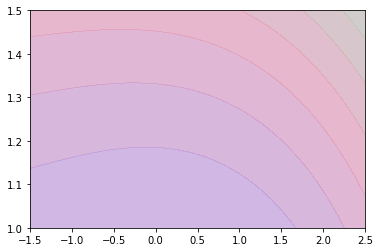

In [ ]:
from matplotlib import pyplot as plt
def plot_predictions(clf,axes):
  x0s = np.linspace(axes[0], axes[1], 100)
  x1s = np.linspace(axes[2], axes[3], 100)
  x0 ,x1 = np.meshgrid (x0s, x1s)
  x = np.c_[x0.ravel(), x1.ravel()]
  y_pred = clf.predict(x).reshape(x0.shape)
  y_decision = clf.decision_function(x).reshape(x0.shape)
  plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
  plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(Polynomial_svm_clf, [-1.5, 2.5, 1,1.5])
plot_dataset(x, y, [-1.5, 2.5, 1,1.5])

save_fig("moons_polynomial_svc_plot")
plt.show()

NotFittedError: ignored

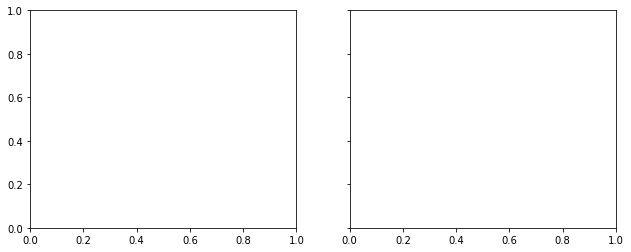

In [ ]:
#Nonlinear SVM Classification (Polynomial Kernel)
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline((
("scaler", StandardScaler()),
("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
))


fig, axes = plt.subplots(ncols=2, figsize=(10.5 , 4), sharey=True)


plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(x, y, [-1.5, 2.5, 1,1.5])
plt.title(r"$d=3,r=1, c=5$" , fontsize=18)

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.5, 1,1.5])
plot_dataset(x, y, [-1.5, 2.5, 1,1.5])
plt.title(r"$d=10,r=100, c=5$" , fontsize=18)
plt.ylabel("")

save_fig("moons_kernelized_polynomial_svc_plot")
plt.show()

poly_kernel_svm_clf.fit(X, y)


In [ ]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline((
("scaler", StandardScaler()),
("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
))
poly_kernel_svm_clf.fit(X, Y)



Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

# SVRex1


In [ ]:
#Import Libraries
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
#----------------------------------------------------

#load boston data

BostonData = load_boston()

#X Data
X = BostonData.data

#y Data
y = BostonData.target





/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
#----------------------------------------------------
#Splitting data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44, shuffle =True)



In [ ]:
#----------------------------------------------------
#Applying SVR Model

'''
sklearn.svm.SVR(kernel=’rbf’, degree=3, gamma=’auto_deprecated’, coef0=0.0, tol=0.001,
                C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False,max_iter=-1)
'''

SVRModel = SVR(C = 20,epsilon=0.01,kernel = 'linear') # it also can be : linear, poly, rbf, sigmoid, precomputed
SVRModel.fit(X_train, y_train)

#Calculating Details
print('SVRModel Train Score is : ' , SVRModel.score(X_train, y_train))
print('SVRModel Test Score is : ' , SVRModel.score(X_test, y_test))
print('----------------------------------------------------')



SVRModel Train Score is :  0.7090367201312007
SVRModel Test Score is :  0.7083615633679301
----------------------------------------------------


In [ ]:
#Calculating Prediction
y_pred = SVRModel.predict(X_test)
print('Predicted Value for SVRModel is : ' , y_pred[:10])

#----------------------------------------------------
#Calculating Mean Absolute Error
MAEValue = mean_absolute_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
print('Mean Absolute Error Value is : ', MAEValue)

#----------------------------------------------------
#Calculating Mean Squared Error
MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
print('Mean Squared Error Value is : ', MSEValue)

#----------------------------------------------------
#Calculating Median Squared Error
MdSEValue = median_absolute_error(y_test, y_pred)
print('Median Squared Error Value is : ', MdSEValue )

Predicted Value for SVRModel is :  [17.75060353 23.34565078 21.17980104 34.01891939 14.69566527 31.66434121
 19.91664812 22.35663951 28.170987   21.21226216]
Mean Absolute Error Value is :  3.616893724739304
Mean Squared Error Value is :  28.684927318043773
Median Squared Error Value is :  2.291042327045524


# SVRex2

In [ ]:
import numpy as np
import pandas as pd

dataset = pd.read_csv('Earthquakes.csv')

dataset.head(20)

In [ ]:

from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = imp.fit(dataset)
dataset = imp.transform(dataset)





In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
dataset = sc.fit_transform(dataset)


X = dataset[:, :-1]
y = dataset[:, -1]

X
y




In [ ]:
from sklearn.svm import SVR
clf = SVR(kernel = 'linear')
clf.fit(X, y)

y_pred = clf.predict([[90,12,12,-5,54,0.3,0.9,3.5,16.2,10]])
y_pred

# SVCex1

In [ ]:
#Import Libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
#----------------------------------------------------

#load breast cancer data

BreastData = load_breast_cancer()

#X Data
X = BreastData.data

#y Data
y = BreastData.target





In [ ]:
#----------------------------------------------------
#Splitting data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44, shuffle =True)



In [ ]:
#----------------------------------------------------
#Applying SVC Model

'''
sklearn.svm.SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto_deprecated’, coef0=0.0, shrinking=True,
                probability=False, tol=0.001, cache_size=200, class_weight=None,verbose=False,
                max_iter=-1, decision_function_shape='ovr’, random_state=None)
'''

SVCModel = SVC(kernel= 'poly',# it can be also linear,poly,sigmoid,precomputed
               max_iter=100,C=100.0,gamma='auto')
SVCModel.fit(X_train, y_train)

#Calculating Details
print('SVCModel Train Score is : ' , SVCModel.score(X_train, y_train))
print('SVCModel Test Score is : ' , SVCModel.score(X_test, y_test))
print('----------------------------------------------------')




SVCModel Train Score is :  0.7427821522309711
SVCModel Test Score is :  0.7925531914893617
----------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


Predicted Value for SVCModel is :  [1 1 1 0 1 1 1 1 1 1]
Confusion Matrix is : 
 [[ 29  39]
 [  0 120]]


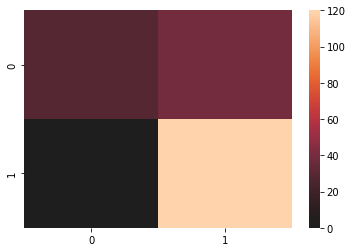

In [ ]:
#Calculating Prediction
y_pred = SVCModel.predict(X_test)
print('Predicted Value for SVCModel is : ' , y_pred[:10])

#----------------------------------------------------
#Calculating Confusion Matrix
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)

# drawing confusion matrix
sns.heatmap(CM, center = True)
plt.show()

# SVCex2

In [ ]:
import numpy as np
X = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])
#y = np.array(['a','a','b','b'])
y = np.array([1,1,2,2])
from sklearn.svm import SVC
clf = SVC(gamma='auto')
clf.fit(X, y)
print(clf.predict([[-0.2, -1]]))


[1]


# New Section